In [1]:
import os
import io
import trimesh
import b3d
import genjax
import jax
import b3d.bayes3d as bayes3d
import jax.numpy as jnp
import numpy as np
import rerun as rr
from PIL import Image
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm
from genjax import Pytree
# from genjax._src.core.serialization.msgpack import msgpack_serialize

In [2]:
# paths for reading physion metadata
physion_assets_path = os.path.join(
    b3d.get_root_path(),
    "assets/physion/lf_0/",)

In [6]:
def extract_scale(hdf5_file_path):
    with h5py.File(hdf5_file_path, "r") as f:
        # extract scale info
        scale_x = np.array(f['static']['scale_x'])
        scale_y = np.array(f['static']['scale_y'])
        scale_z = np.array(f['static']['scale_z'])
    return scale_x, scale_y, scale_z


In [7]:
xs = []
ys = []
zs = []
for path, dirs, files in os.walk(physion_assets_path):
    for name in (files + dirs):
        if name.endswith('.hdf5'):
            scale_x, scale_y, scale_z = extract_scale(os.path.join(path, name))
            xs.append(scale_x)
            ys.append(scale_y)
            zs.append(scale_z)

xs = np.concatenate(xs).ravel()
ys = np.concatenate(ys).ravel()
zs = np.concatenate(zs).ravel()

(array([4269.,  638.,  402.,  123.,  216.,   35.,   13.,  174.,    8.,
          16.]),
 array([0.1 , 0.79, 1.48, 2.17, 2.86, 3.55, 4.24, 4.93, 5.62, 6.31, 7.  ]),
 <BarContainer object of 10 artists>)

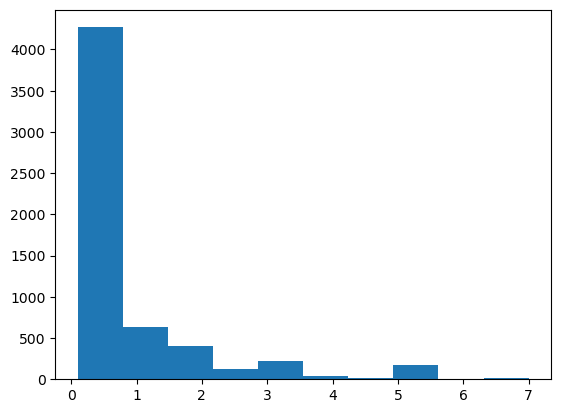

In [8]:
plt.hist(xs)

(array([4801.,  683.,  163.,   91.,   65.,   28.,   30.,   13.,   12.,
           8.]),
 array([0.01      , 0.63058994, 1.25117989, 1.87176983, 2.49235978,
        3.11294972, 3.73353967, 4.35412961, 4.97471956, 5.5953095 ,
        6.21589945]),
 <BarContainer object of 10 artists>)

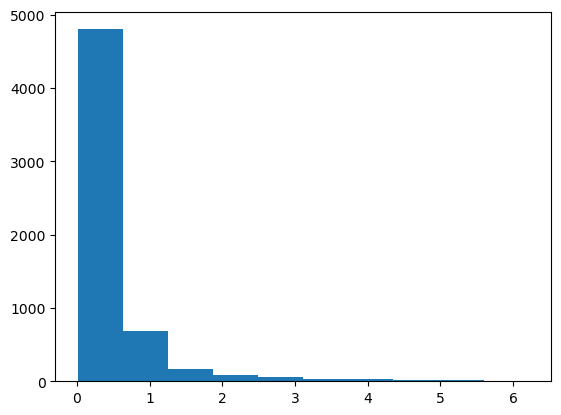

In [9]:
plt.hist(ys)

(array([4150.,  622.,  532.,  132.,  212.,   35.,   13.,  174.,    8.,
          16.]),
 array([0.10034793, 0.79031314, 1.48027834, 2.17024355, 2.86020876,
        3.55017396, 4.24013917, 4.93010438, 5.62006959, 6.31003479,
        7.        ]),
 <BarContainer object of 10 artists>)

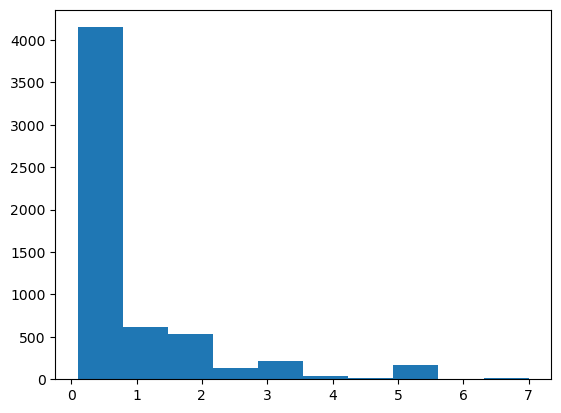

In [10]:
plt.hist(zs)

In [14]:
subkey = jax.random.PRNGKey(0)
jax.random.normal(subkey, (4,))

Array([ 1.8160863 , -0.75488514,  0.33988908, -0.53483534], dtype=float32)

In [15]:
jax.random.uniform(subkey, (3,))

Array([0.9653214 , 0.31468165, 0.63302994], dtype=float32)